In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

import dionysus as d

from biomarker.data_collection import *

data_collection


In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS).reset_index().drop(['index'], axis=1)
L = get_filename_list(excel['Associated data'])

[3, 9]


In [3]:
x1s = []
for l in L:
    x1s.append(parse_x1(l))

In [4]:
POI = -1
x1s[POI]

,Center Number,Atomic Number,X,Y,Z
0,1,6,3.193872,-0.594287,-1.115118
1,2,6,3.305664,-1.426349,-0.007060
2,3,6,2.182104,-2.001068,0.570666
3,4,6,0.924108,-1.739653,0.029381
4,5,6,0.766827,-0.870797,-1.063099
5,6,6,1.928757,-0.319951,-1.616650
6,7,35,5.030936,-1.796982,0.733424
7,8,17,-0.432791,-2.597940,0.732279
8,9,7,-0.480197,-0.528168,-1.685289
9,10,6,-1.671312,-0.298624,-0.945574


Text(0.5,0,'Z')

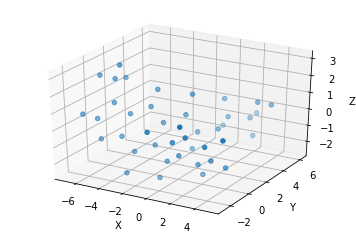

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1s[POI].X, x1s[POI].Y, x1s[POI].Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [6]:
points = x1s[POI][['X', 'Y', 'Z']].values
dists = pdist(points, 'euclidean')
# r = np.mean(dists)
r = 5

In [7]:
k = 5
print(k, r)
f = d.fill_rips(points, k, r)
print(f)

5 5
Filtration with 25450 simplices


In [8]:
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
print(dgms)
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt.birth, pt.death)

[Diagram with 42 points, Diagram with 7 points, Diagram with 2 points, Diagram with 0 points, Diagram with 0 points, Diagram with 5505 points]
0 0.0 inf
0 0.0 1.390186071395874
0 0.0 1.3879684209823608
0 0.0 1.3942314386367798
0 0.0 1.3999754190444946
0 0.0 1.3882761001586914
0 0.0 1.9137003421783447
0 0.0 1.7526828050613403
0 0.0 1.4351249933242798
0 0.0 1.4207828044891357
0 0.0 1.3945376873016357
0 0.0 1.39182710647583
0 0.0 1.3885728120803833
0 0.0 1.3859785795211792
0 0.0 1.3913699388504028
0 0.0 1.3528642654418945
0 0.0 1.3798929452896118
0 0.0 1.372651219367981
0 0.0 1.3097518682479858
0 0.0 1.45265531539917
0 0.0 1.509665846824646
0 0.0 1.2154431343078613
0 0.0 1.3804088830947876
0 0.0 1.396658182144165
0 0.0 1.4406967163085938
0 0.0 1.5113945007324219
0 0.0 1.423362374305725
0 0.0 1.0815311670303345
0 0.0 1.0810530185699463
0 0.0 1.0836200714111328
0 0.0 1.0127735137939453
0 0.0 1.082451343536377
0 0.0 1.0813732147216797
0 0.0 1.0897154808044434
0 0.0 1.092626690864563
0 0.0 1.

5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.249988079071045 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319824 inf
5 4.260470390319

5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005127 inf
5 4.477165699005

5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785889 inf
5 4.597484111785

5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf
5 4.7695794105529785 inf


5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875244 inf
5 4.797171115875

5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239258 inf
5 4.877107620239

5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878906 inf
5 4.892189025878

5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.940681457519531 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592529 inf
5 4.943038463592

5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.958452224731445 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843506 inf
5 4.973031520843

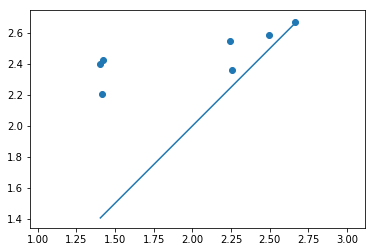

In [9]:
d.plot.plot_diagram(dgms[1], show = True)

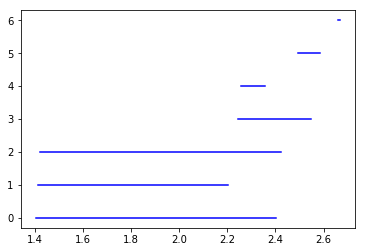

In [10]:
d.plot.plot_bars(dgms[1], show = True)

In [11]:
r = 6
k = 2
results = []
for i in range(len(x1s)):
    print('step: {}'. format(i))
    for j in range(len(x1s)):
        pointsi = x1s[i][['X', 'Y', 'Z']].values
        fi = d.fill_rips(pointsi, k, r)
        mi = d.homology_persistence(fi)
        dgmsi = d.init_diagrams(mi, fi)
        if i != j:
            pointsj = x1s[j][['X', 'Y', 'Z']].values
            fj = d.fill_rips(pointsj, k, r)
            mj = d.homology_persistence(fj)
            dgmsj = d.init_diagrams(mj, fj)
            
            wdist = d.wasserstein_distance(dgmsi[1], dgmsj[1], q=2)
            logKdist = excel['Output: logK'][i] - excel['Output: logK'][j]
            
            results.append({'wasserstein': wdist, 'logK': logKdist})
            

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110


In [12]:
resdf = pd.DataFrame(results)
print(resdf.shape)
resdf.head()

(37056, 2)


,logK,wasserstein
0,0.00,0.000000
1,-0.24,0.700519
2,-0.41,0.774620
3,-0.51,0.668695
4,-1.16,0.697472


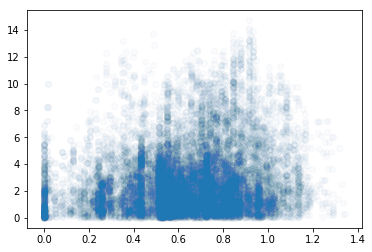

In [13]:
X = resdf[np.abs(resdf['logK']) > 0]
plt.scatter(X['wasserstein'], np.abs(X['logK']), alpha=0.01)

In [14]:
r = 6
k = 2
results = []
for i in range(len(x1s)):
    print('step: {}'. format(i))
    for j in range(len(x1s)):
        pointsi = x1s[i][['X', 'Y', 'Z']].values
        fi = d.fill_rips(pointsi, k, r)
        mi = d.homology_persistence(fi)
        dgmsi = d.init_diagrams(mi, fi)
        if i != j:
            pointsj = x1s[j][['X', 'Y', 'Z']].values
            fj = d.fill_rips(pointsj, k, r)
            mj = d.homology_persistence(fj)
            dgmsj = d.init_diagrams(mj, fj)
            
            wdist = d.bottleneck_distance(dgmsi[1], dgmsj[1])
            logKdist = excel['Output: logK'][i] - excel['Output: logK'][j]
            
            results.append({'bottleneck': wdist, 'logK': logKdist})

step: 0
step: 1


ValueError: cannot infer type for <class 'NoneType'>

In [ ]:
resdf_bottle = pd.DataFrame(results)
print(resdf_bottle.shape)
resdf_bottle.head()

In [ ]:
X = resdf_bottle[np.abs(resdf['logK']) > 0]
plt.scatter(X['bottleneck'][-191:], np.abs(X['logK'][-191:]), alpha=0.01)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
y_buck = excel['Output: logKbucket'].values

rbf_kernel(X, y_buck)